In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("heart_v2.csv")

In [3]:
df.head()

,age,sex,BP,cholestrol,heart disease
0,70,1,130,322,1
1,67,0,115,564,0
2,57,1,124,261,1
3,64,1,128,263,0
4,74,0,120,269,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   age            270 non-null    int64
 1   sex            270 non-null    int64
 2   BP             270 non-null    int64
 3   cholestrol     270 non-null    int64
 4   heart disease  270 non-null    int64
dtypes: int64(5)
memory usage: 10.7 KB


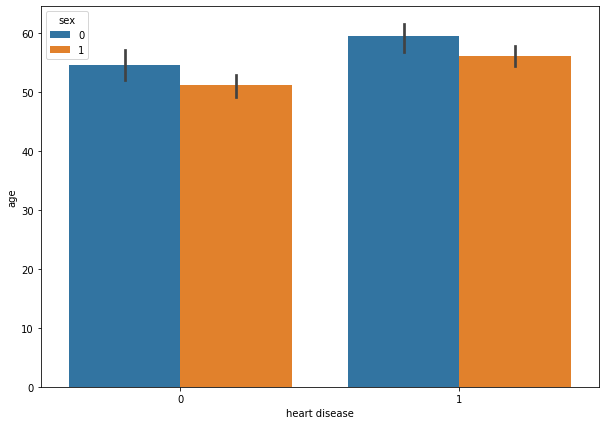

In [5]:
plt.figure(figsize=(10, 7))
sns.barplot(df["heart disease"], df["age"], hue=df["sex"])
plt.show()

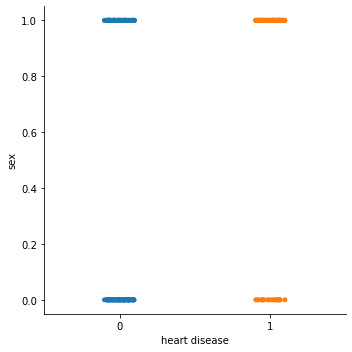

In [6]:
sns.catplot(data=df, x="heart disease", y="sex")
plt.show()

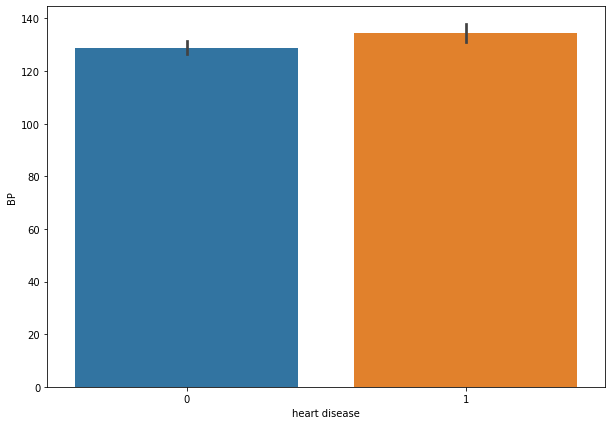

In [7]:
plt.figure(figsize=(10, 7))
sns.barplot(df["heart disease"], df["BP"])
plt.show()

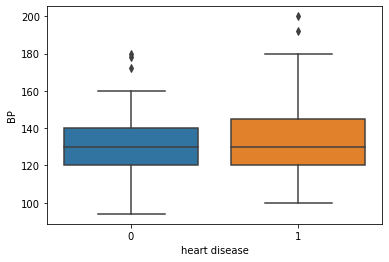

In [8]:
sns.boxplot(data=df, x="heart disease", y="BP")
plt.show()

In [9]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df, train_size=0.7, random_state=101)

In [10]:
train_df.shape, test_df.shape

((189, 5), (81, 5))

In [11]:
x_train = train_df.drop(columns="heart disease")
y_train = train_df["heart disease"]

x_test = test_df.drop(columns="heart disease")
y_test = test_df["heart disease"]

In [12]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=3)

In [13]:
dt.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [14]:
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydotplus
import graphviz

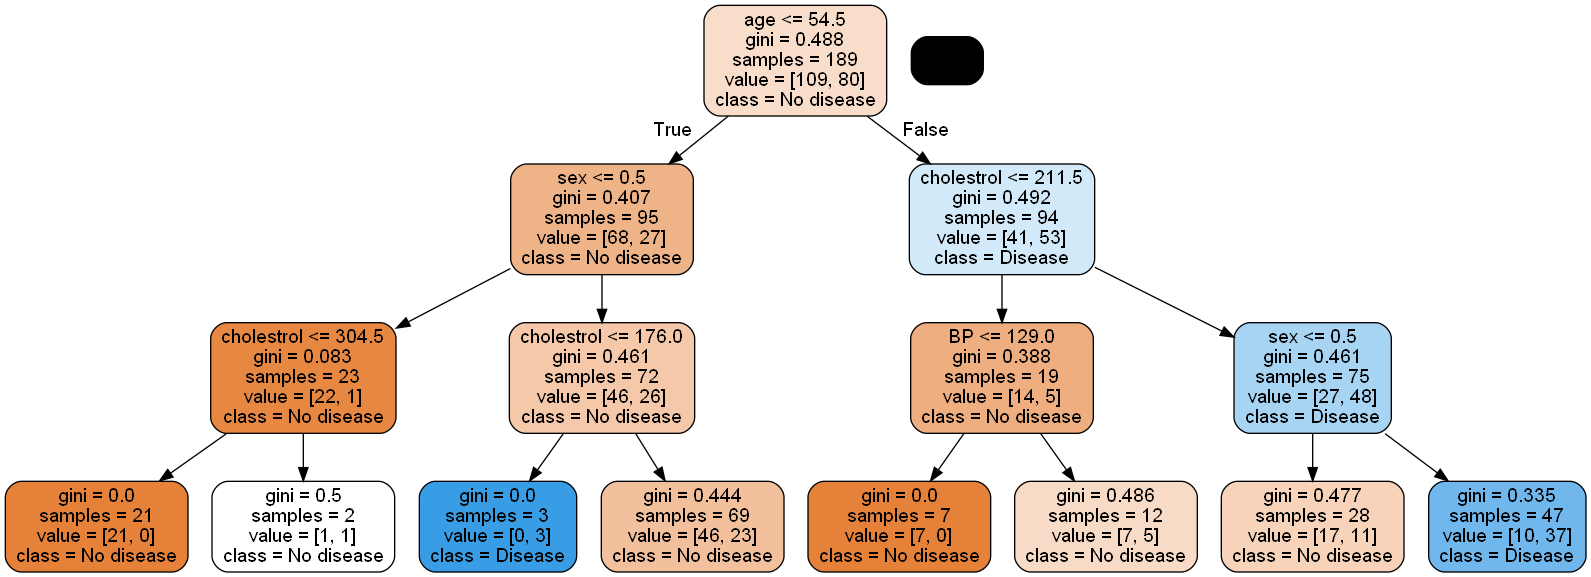

In [15]:
dot_data = StringIO()

export_graphviz(dt, out_file=dot_data, filled=True, rounded=True, feature_names=x_train.columns,
               class_names=["No disease", "Disease"])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

Image(graph.create_png())

In [16]:
y_train_pred = dt.predict(x_train)
y_test_pred = dt.predict(x_test)

In [17]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [18]:
accuracy_score(y_train, y_train_pred)

0.7354497354497355

In [19]:
confusion_matrix(y_train, y_train_pred)

array([[99, 10],
       [40, 40]], dtype=int64)

In [20]:
accuracy_score(y_test, y_test_pred)

0.6296296296296297

In [21]:
confusion_matrix(y_test, y_test_pred)

array([[33,  8],
       [22, 18]], dtype=int64)

#### Making some helper functions to evaluate the model and plot the graph

In [48]:
def plot(dt_classifier):
    dot_data = StringIO()

    export_graphviz(dt_classifier, out_file=dot_data, filled=True, rounded=True, feature_names=x_train.columns,
                   class_names=["No disease", "Disease"])

    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

    return Image(graph.create_png())

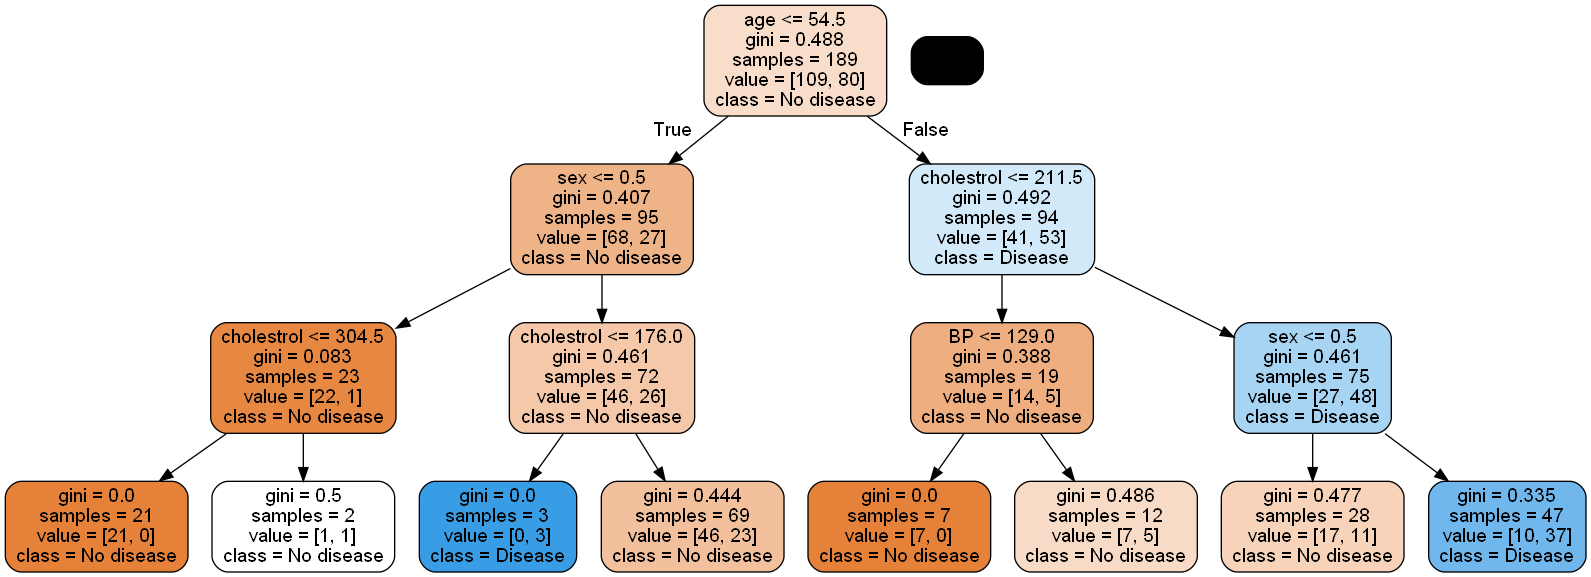

In [49]:
plot(dt)

In [35]:
def evaluate(dt_classifier):
    y_train_pred = dt_classifier.predict(x_train)
    y_test_pred = dt_classifier.predict(x_test)
    print("Train set performance")
    print("Acc-", accuracy_score(y_train, y_train_pred))
    print(confusion_matrix(y_train, y_train_pred))
    print("-"*25)
    print("Test set performance")
    print("Acc-", accuracy_score(y_test, y_test_pred))
    print(confusion_matrix(y_test, y_test_pred))

In [36]:
evaluate(dt)

Train set performance
Acc- 0.7354497354497355
[[99 10]
 [40 40]]
-------------------------
Test set performance
Acc- 0.6296296296296297
[[33  8]
 [22 18]]


#### No hyperparameter tuning

In [37]:
dt_free = DecisionTreeClassifier()
dt_free.fit(x_train, y_train)

DecisionTreeClassifier()

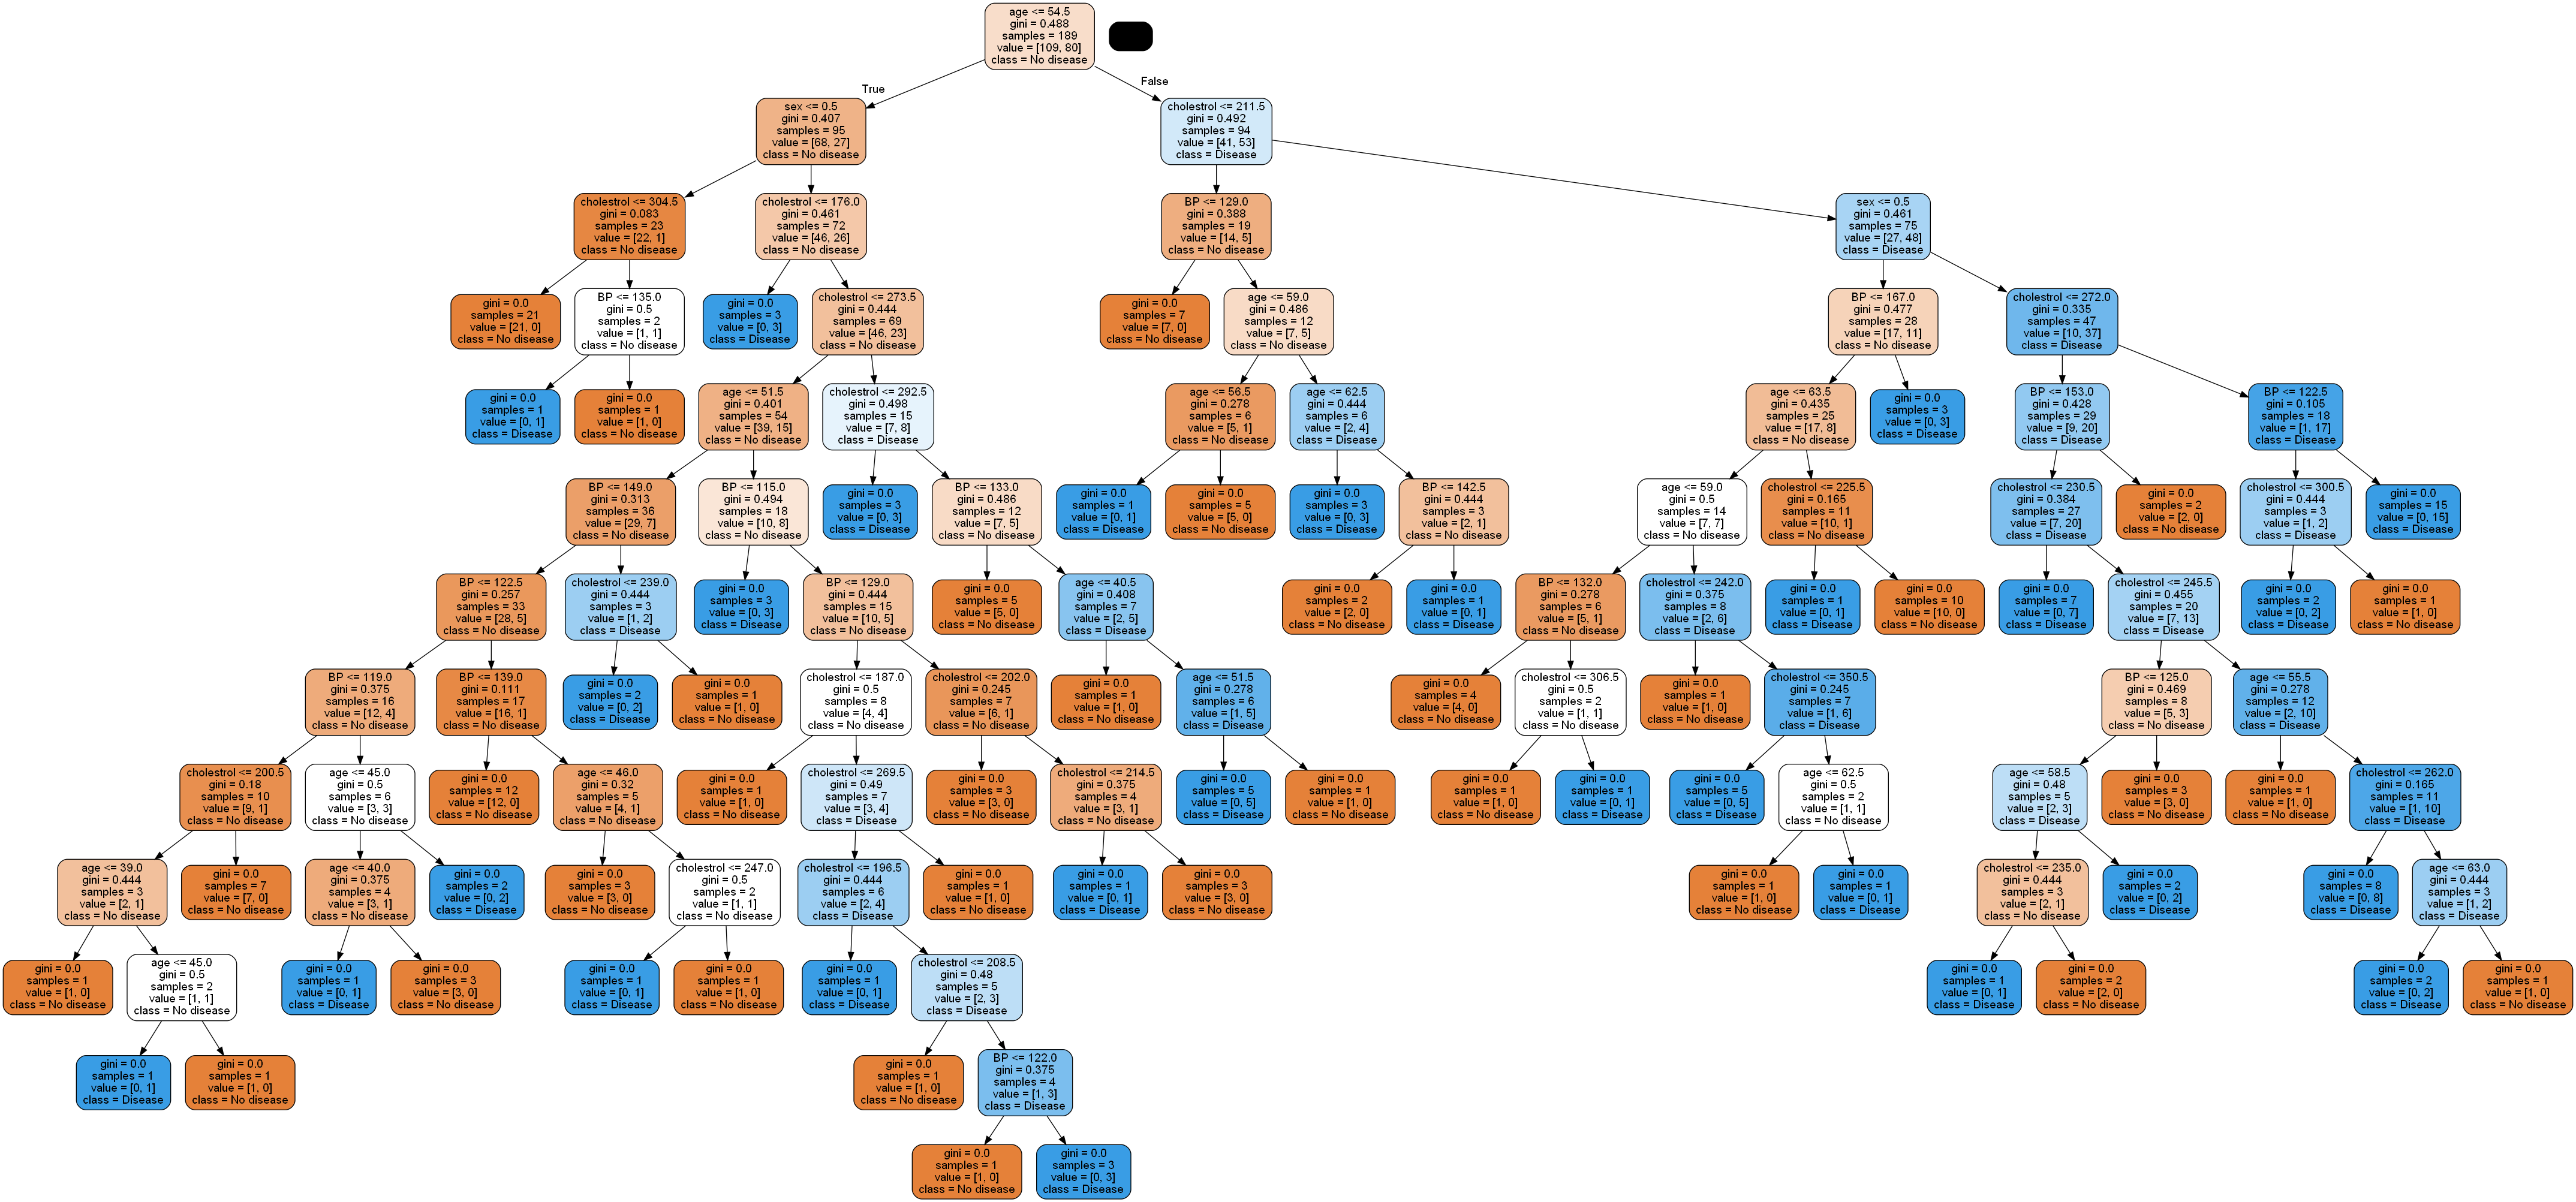

In [50]:
plot(dt_free)

In [41]:
evaluate(dt_free)

Train set performance
Acc- 1.0
[[109   0]
 [  0  80]]
-------------------------
Test set performance
Acc- 0.7283950617283951
[[29 12]
 [10 30]]


#### Depth control

In [42]:
dt_depth = DecisionTreeClassifier(max_depth=4)
dt_depth.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=4)

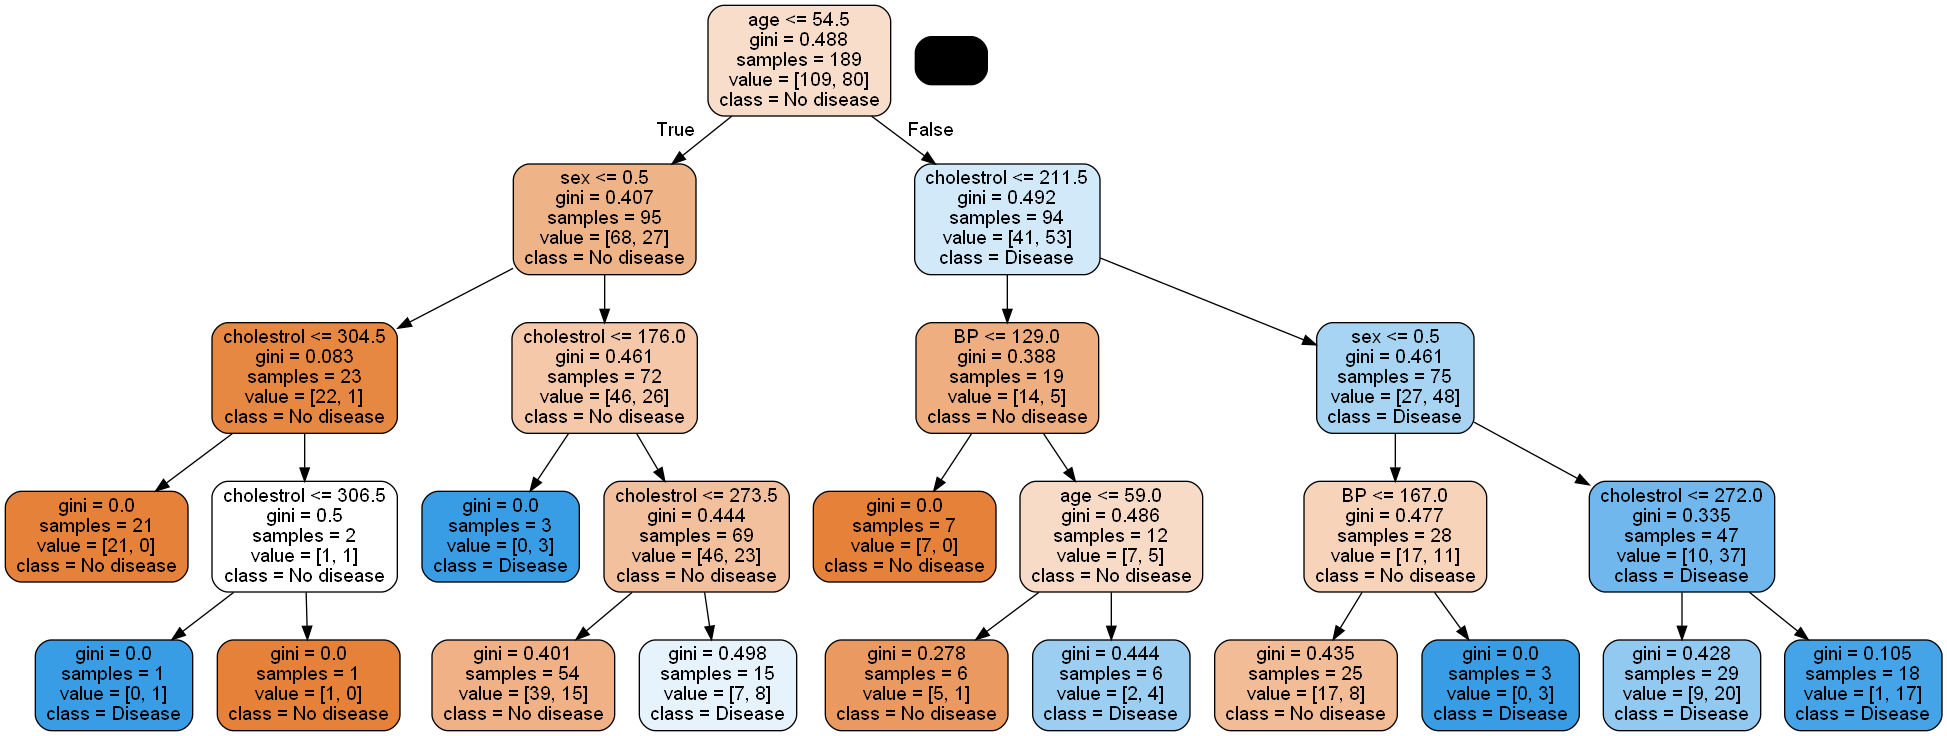

In [51]:
plot(dt_depth)

In [44]:
evaluate(dt_depth)

Train set performance
Acc- 0.7724867724867724
[[90 19]
 [24 56]]
-------------------------
Test set performance
Acc- 0.6790123456790124
[[30 11]
 [15 25]]


#### Minimum number of samples required in node before splitting control

In [45]:
dt_min_samples = DecisionTreeClassifier(min_samples_split=20)
dt_min_samples.fit(x_train, y_train)

DecisionTreeClassifier(min_samples_split=20)

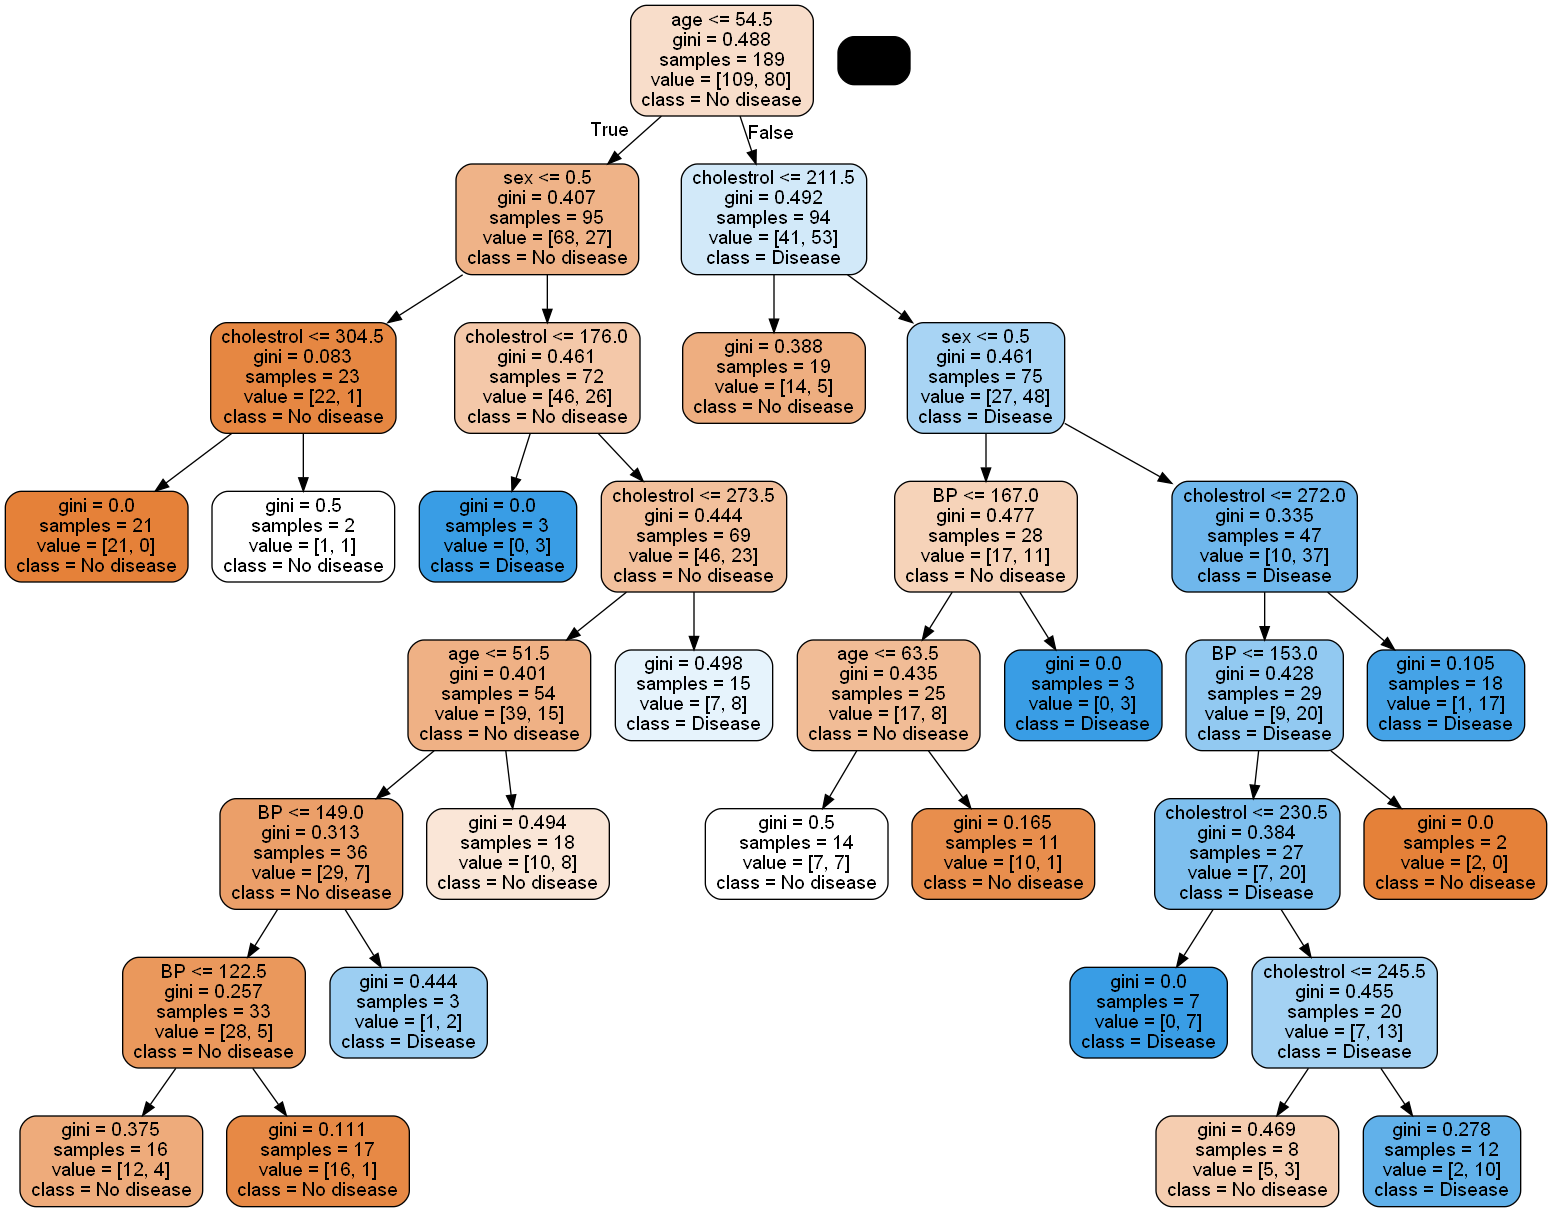

In [47]:
plot(dt_min_samples)

#### Min number of samples each node should have - control

In [52]:
dt_min_leaf = DecisionTreeClassifier(min_samples_leaf=20)
dt_min_leaf.fit(x_train, y_train)

DecisionTreeClassifier(min_samples_leaf=20)

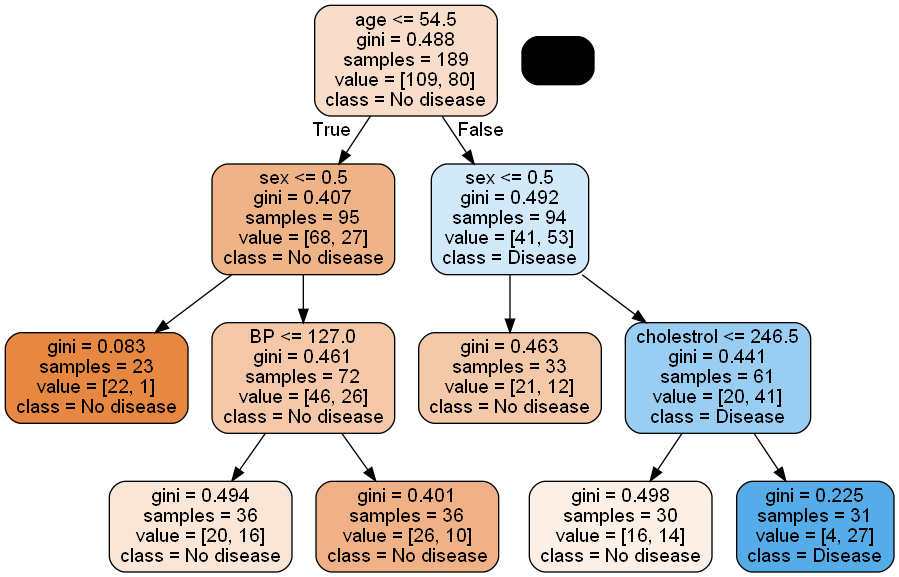

In [53]:
plot(dt_min_leaf)

In [54]:
evaluate(dt_min_leaf)

Train set performance
Acc- 0.6984126984126984
[[105   4]
 [ 53  27]]
-------------------------
Test set performance
Acc- 0.6172839506172839
[[39  2]
 [29 11]]


### Hyper Parameter Tuning using GridSearchCV

In [55]:
from sklearn.model_selection import GridSearchCV

In [65]:
dt = DecisionTreeClassifier(random_state=100)

params = {
    "max_depth":[3, 4, 5, 6, 7, 8, 9, 10],
    "min_samples_split":[5, 10, 15, 20, 25, 30, 35, 40],
    "min_samples_leaf":[5, 10, 15, 20, 25, 30, 35, 40]
}

In [66]:
gs = GridSearchCV(estimator=dt, param_grid=params, scoring="accuracy", n_jobs=-1, cv=5, verbose=1)

In [67]:
gs.fit(x_train, y_train)

Fitting 5 folds for each of 512 candidates, totalling 2560 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=100),
             n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_leaf': [5, 10, 15, 20, 25, 30, 35, 40],
                         'min_samples_split': [5, 10, 15, 20, 25, 30, 35, 40]},
             scoring='accuracy', verbose=1)

In [68]:
gs.best_estimator_

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, min_samples_split=20,
                       random_state=100)

In [69]:
gs.best_params_

{'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 20}

In [70]:
gs.best_score_

0.671977240398293

In [75]:
dt_best = DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, min_samples_split=20,
                       random_state=100)

dt_best.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, min_samples_split=20,
                       random_state=100)

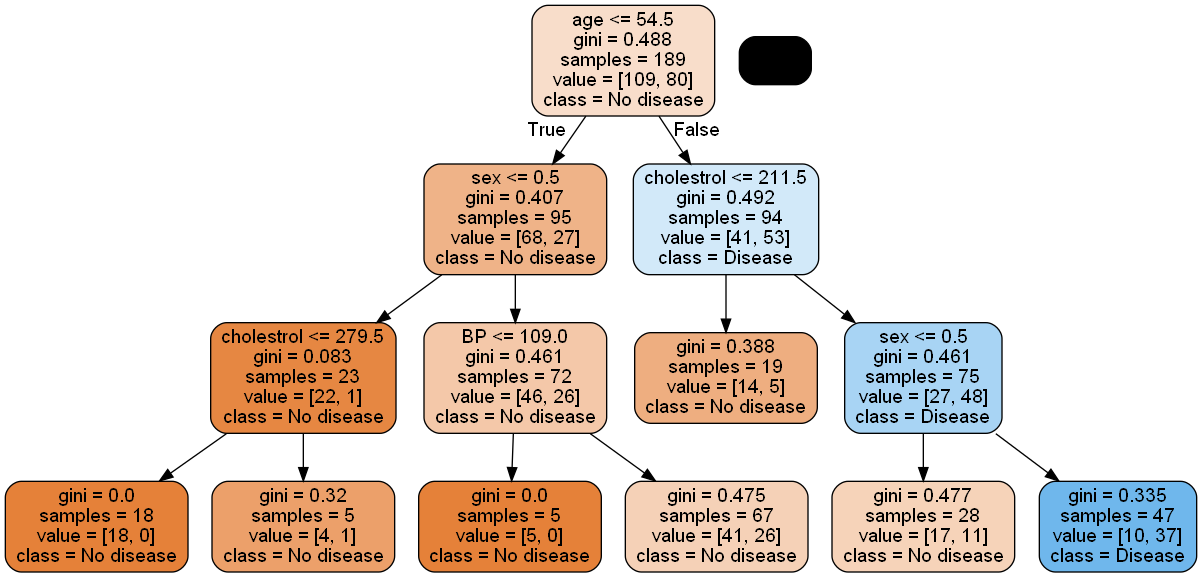

In [76]:
plot(dt_best)

In [77]:
evaluate(dt_best)

Train set performance
Acc- 0.7195767195767195
[[99 10]
 [43 37]]
-------------------------
Test set performance
Acc- 0.6419753086419753
[[34  7]
 [22 18]]
